# Naive Bayes Algorithm

. Naive bayes is probabilistic machine learning based on Bayes theorem,which describes the probability of an event based on prior knowledge or evidence.In the context of classification , the naive bayes theroem is used to predict the class label of given sample based on its features.

. The Naive bayes therorem worked on assumption that features in the dataset are indpendent to each other,given the class label.This is known as indpendence assumption by simplyfing conditional probablities needed to make predcitions.

. This alogrithm is also generative model meaning that it models the joint probability distribution of the features and the class label.

. it can be used  for both binary and multiclass calssification problems,working well with high dimensioal datastes.also used for text classification,spam filitering etc.

## types of Naive Algorithm

1.  Gaussain Naive Bayes: most commonly used type of classifier.it contain contiuous data and dataset follows normal distribution.not worked well with highly skewed data.

2. Multinomial Naive Bayes: used discrete data (non negative integer values) e.g text classification,spam filtering.assumption that features follows multinomial distribution.

3. Bernoulli Naive Bayes: similer to multinomial but used for binary classification( 0 and 1),used for discrete data and follows bernoulli distribution.used also for text classification .

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

iris= load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


model = GaussianNB().fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))



1.0


In [16]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
X = diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
y = diamonds['cut']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model2 = GaussianNB().fit(X_train, y_train)

y_pred = model2.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5727660363366703


In [28]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import BernoulliNB


digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model3 = BernoulliNB(binarize=0.5).fit(X_train, y_train)

y_pred = model3.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8638888888888889


In [27]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import MultinomialNB


digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model3 = MultinomialNB().fit(X_train, y_train)

y_pred = model3.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9111111111111111


In practice, to get best possible algorthim from three types is using cross validation.

### STEPS TO FOLLOW:

1. preprocess the data e.g feature scaling,handling missing values,encoding cateogical labels.
2. splits the data into training and test sets.
3. choose naive bayes alogorthim and hypermeters:guassian or bernoulli etc.
4. train and evaulate model
5. refine the model
   

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.datasets import load_iris  # Replace with your dataset

# Step 2: Load your dataset
data = load_iris()  # Example dataset, replace with your own data
X = data.data
y = data.target

# Step 3: Define hyperparameter grids
param_grid_gaussian = {}

param_grid_multinomial = {'alpha': [0.1, 0.5, 1.0, 2.0]}

param_grid_bernoulli = {'alpha': [0.1, 0.5, 1.0, 2.0],'binarize': [0.0, 0.5, 1.0]}

# Step 4: Create a dictionary mapping algorithms to hyperparameter grids
param_grids = {
    'Gaussian Naive Bayes': (GaussianNB(), param_grid_gaussian),
    'Multinomial Naive Bayes': (MultinomialNB(), param_grid_multinomial),
    'Bernoulli Naive Bayes': (BernoulliNB(), param_grid_bernoulli)
}

# Step 5: Initialize GridSearchCV objects for each algorithm
results = {}
for algo, (model, param_grid) in param_grids.items():
    grid_search = GridSearchCV(model, param_grid,scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X, y)
    results[algo] = {
        'Best Params': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }

# Step 6: Print the results
for algo, result in results.items():
    print(f'{algo} - Best Parameters: {result["Best Params"]}')
    print(f'{algo} - Best Cross-Validation Score: {result["Best Score"]}')
    print()


Gaussian Naive Bayes - Best Parameters: {}
Gaussian Naive Bayes - Best Cross-Validation Score: 0.9533333333333334

Multinomial Naive Bayes - Best Parameters: {'alpha': 2.0}
Multinomial Naive Bayes - Best Cross-Validation Score: 0.9600000000000002

Bernoulli Naive Bayes - Best Parameters: {'alpha': 0.1, 'binarize': 1.0}
Bernoulli Naive Bayes - Best Cross-Validation Score: 0.6666666666666666



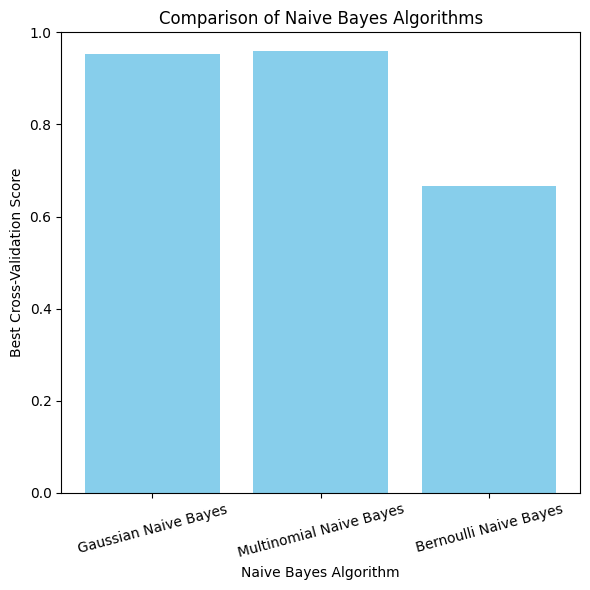

In [39]:
import matplotlib.pyplot as plt

# Extract the best cross-validation scores and algorithms
algo_names = list(results.keys())
best_scores = [result['Best Score'] for result in results.values()]

# Create a bar chart to visualize the best scores
plt.figure(figsize=(6, 6))
plt.bar(algo_names, best_scores, color='skyblue')
plt.xlabel('Naive Bayes Algorithm')
plt.ylabel('Best Cross-Validation Score')
plt.title('Comparison of Naive Bayes Algorithms')
plt.ylim([0, 1])  # Set the y-axis limit
plt.xticks(rotation=15)  # Rotate the x-axis labels for readability
plt.tight_layout()

# Display the chart
plt.show()
